In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [89]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
train.drop('PassengerId', axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Female')

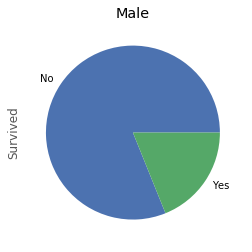

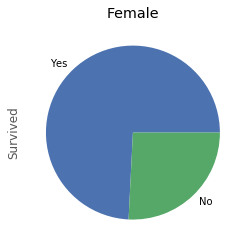

In [92]:
#Plots for survivance of male and female genders
s_replacement = {
    0: 'No',
    1: 'Yes'
}
train['Survived'].replace(s_replacement, inplace=True)
train['Survived'][train['Sex'] == 'male'].value_counts().plot(kind='pie')
plt.title('Male')
plt.figure()
train['Survived'][train['Sex'] == 'female'].value_counts().plot(kind='pie')
plt.title('Female')

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [94]:
#Extract prefixes from names
prefixes = [x[x.find(',') +2: x.find('.')] for x in train['Name']]
train['Name'] = prefixes

Text(0.5, 1.0, 'Distribution of Titles')

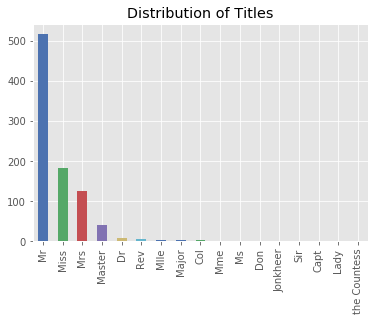

In [95]:
train['Name'].value_counts().plot(kind='bar')
plt.title('Distribution of Titles')

Text(0.5, 1.0, 'There are more people survived with 0 children than with more.')

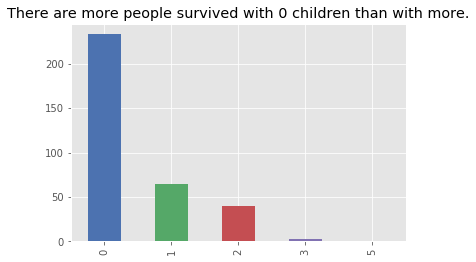

In [96]:
train['Parch'][train['Survived'] == 'Yes'].value_counts().plot(kind='bar')
plt.title('There are more people survived with 0 children than with more.')

In [97]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

Text(0.5, 1.0, 'There is likely to be no relation between age and ticket fare')

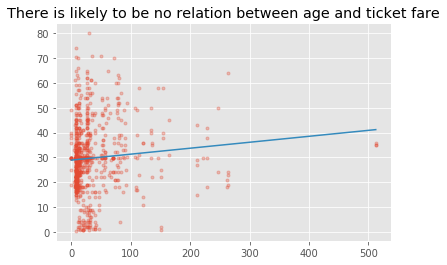

In [98]:
age = train['Age'].values.reshape(-1, 1)
fare = train['Fare'].values.reshape(-1, 1)
plt.style.use('ggplot')
plt.plot(fare, age, 'o', markersize=3, alpha=0.3)
reg = LinearRegression()
lims = np.linspace(np.min(fare), np.max(fare)).reshape(-1, 1)
reg.fit(fare, age)
plt.plot(lims, reg.predict(lims))
plt.title('There is likely to be no relation between age and ticket fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,0.0
1,2,Yes,1,Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,2.0
2,3,Yes,3,Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,Yes,1,Mrs,female,35.000000,1,0,113803,53.1000,C123,0.0
4,5,No,3,Mr,male,35.000000,0,0,373450,8.0500,NaN,0.0
5,6,No,3,Mr,male,29.699118,0,0,330877,8.4583,NaN,1.0
6,7,No,1,Mr,male,54.000000,0,0,17463,51.8625,E46,0.0
7,8,No,3,Master,male,2.000000,3,1,349909,21.0750,NaN,0.0
8,9,Yes,3,Mrs,female,27.000000,0,2,347742,11.1333,NaN,0.0
9,10,Yes,2,Mrs,female,14.000000,1,0,237736,30.0708,NaN,2.0


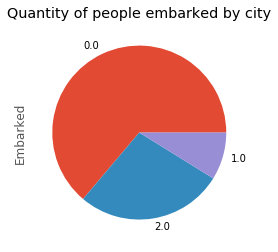

In [99]:
cities = {
    'S': 0,
    'Q': 1,
    'C': 2
}
train['Embarked'].replace(cities, inplace=True)
train[train['Survived'] == 'Yes']['Embarked'].value_counts().plot(kind='pie')
plt.title('Quantity of people embarked by city')
train

In [100]:
#Model building
train['Survived'].replace({
    'Yes': 0,
    'No': 1
}, inplace=True)
train.replace({
    'male': 0,
    'female': 1
}, inplace=True)
cols = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = train[cols].values
y = train['Survived'].values.ravel()

In [101]:
knn = KNeighborsClassifier(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [103]:
grad = GradientBoostingClassifier()
grad.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [104]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
ids = test['PassengerId']
test_data = test[cols]
test_data.replace({
    'male': 0,
    'female': 1
}, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [109]:
cross_val_score(grad, X_train, y_train, cv=5, scoring='f1_macro')
pred = grad.predict(test_data)

In [111]:
sub = pd.DataFrame()
sub['PassengerId'] = ids
sub['Survived'] = pred
sub.to_csv('submission.csv', index=False)